In [38]:
import numpy as np

In [39]:
def iden(n):
    x=np.identity(n)
    return x

a=iden(3)
a[1].reshape(3,1)
(a[1]).reshape(3,1)
a[:,:1]

array([[1.],
       [0.],
       [0.]])

C:\Users\anish\AppData\Local\Temp\ipykernel_19348\444832180.py:66: RuntimeWarning: overflow encountered in double_scalars
  T[i,j,t+1]=k*dt*(a+b)+T[i,j,t]
C:\Users\anish\AppData\Local\Temp\ipykernel_19348\444832180.py:66: RuntimeWarning: invalid value encountered in double_scalars
  T[i,j,t+1]=k*dt*(a+b)+T[i,j,t]
C:\Users\anish\AppData\Local\Temp\ipykernel_19348\444832180.py:64: RuntimeWarning: overflow encountered in double_scalars
  a=(T[i+1,j,t]-2*T[i,j,t]+T[i-1,j,t])/dx**2 # d2dx2
C:\Users\anish\AppData\Local\Temp\ipykernel_19348\444832180.py:65: RuntimeWarning: overflow encountered in double_scalars
  b=(T[i,j+1,t]-2*T[i,j,t]+T[i,j-1,t])/dy**2 # d2dy2
C:\Users\anish\AppData\Local\Temp\ipykernel_19348\444832180.py:64: RuntimeWarning: invalid value encountered in double_scalars
  a=(T[i+1,j,t]-2*T[i,j,t]+T[i-1,j,t])/dx**2 # d2dx2
C:\Users\anish\AppData\Local\Temp\ipykernel_19348\444832180.py:65: RuntimeWarning: invalid value encountered in double_scalars
  b=(T[i,j+1,t]-2*T[i,j,t]+T

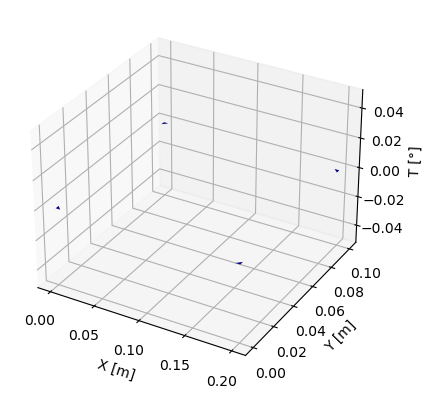

In [52]:
# 2D Transient Heat Equation for steel plate solver via finite-difference scheme


import numpy as np
from mpl_toolkits import mplot3d 
import matplotlib.pyplot as plt

# Physical parameters
# k = 1.172E-5 # steel, 1% carbon
Lx = 0.2 # length
Ly = 0.1 # width

# Numerical parameters
nx = 40 # number of points in x direction
ny = 40 # number of points in y direction
dt = 0.1 # time step
tf = 10 # final time

# Boundary conditions (Dirichlet)
T0=1 # internal field
T1=2
T2=3
T3=4
T4=5

# Computes cell length
dx = Lx/nx
dy = Ly/ny
k = 2 * ((dx**2 + dy**2) / (dx**2 * dy**2))
# Courant numbers
r1 = k*dt/(dx**2)
r2 = k*dt/(dy**2)

if (r1 > 0.5 or r2 > 0.5):
	raise TypeError('Unstable Solution!')

T = np.zeros((nx,ny,int(tf/dt)))

# Initial condition
for i in range(0,nx-1):
	for j in range(1,ny-1):
		T[i,j,0] = T0

# Boundary conditions set-up
for i in range(0,nx):
	T[i,0,0]=T1
	T[i,ny-1,0]=T2

for j in range(0,ny):
	T[0,j,0]=T3
	T[nx-1,j,0]=T4

# Generate 2D mesh
X = np.linspace(0, Lx, nx, endpoint=True)
Y = np.linspace(0, Ly, ny, endpoint=True)
X, Y = np.meshgrid(X, Y)

# Main time-loop
for t in range (0,int(tf/dt)-1):
	for i in range(1,(nx-1)):
		for j in range (1,(ny-1)):				
			a=(T[i+1,j,t]-2*T[i,j,t]+T[i-1,j,t])/dx**2 # d2dx2
			b=(T[i,j+1,t]-2*T[i,j,t]+T[i,j-1,t])/dy**2 # d2dy2
			T[i,j,t+1]=k*dt*(a+b)+T[i,j,t]		

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
# gist_rainbow_r
ax.plot_surface(X, Y, T[:,:,int(tf/dt)-1], cmap = 'jet', edgecolor = 'none')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('T [°]')
plt.show()


Text(0, 0.5, 'Y')

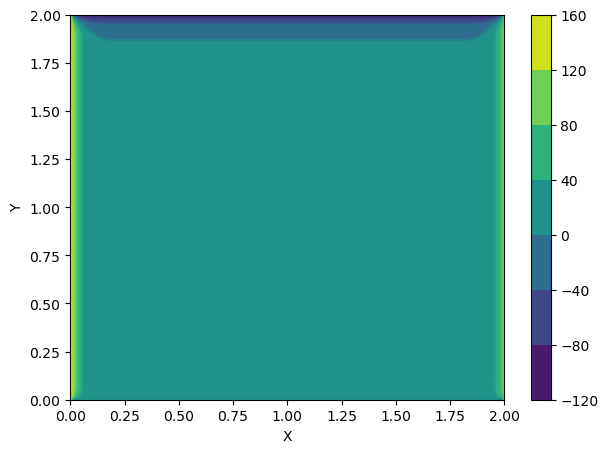

In [41]:
# Grid Generation
import numpy                           
from matplotlib import pyplot  

nx = 200
ny = 200                                  
dx = 2 / (nx-1)
dy = 2 / (ny-1)

# Time Step

nt = 50                                                                   
alpha = 1                                 
dt=2.5e-5                   

# Initial Condition (I.C) and Boundry Condition (B.C)

T = numpy.ones((nx, ny))                         # I.C (U = Velocity)
x = numpy.linspace(0,2,nx)                       # B.C
y = numpy.linspace(0,2,ny)                       # B.C

Tn = numpy.empty_like(T)                         #initialize a temporary array
X, Y = numpy.meshgrid(x,y)

T[0, :] = 20          #  B.C
T[-1,:] = -100        #  B.C
T[:, 0] = 150         #  B.C
T[:,-1] = 100         #  B.C
# Solver
###Run through nt timesteps
    
for n in range(nt + 1): 
    Tn = T.copy()
        
    T[1:-1, 1:-1] = (Tn[1:-1,1:-1] + 
                        ((alpha * dt / dx**2) * 
                        (Tn[1:-1, 2:] - 2 * Tn[1:-1, 1:-1] + Tn[1:-1, 0:-2])) +
                        ((alpha * dt / dy**2) * 
                        (Tn[2:,1: -1] - 2 * Tn[1:-1, 1:-1] + Tn[0:-2, 1:-1])))
        
    T[0, :] = 20          # From B.C
    T[-1,:] = -100        # From B.C
    T[:, 0] = 150         # From B.C
    T[:,-1] = 100         # From B.C

   
fig = pyplot.figure(figsize=(7,5), dpi=100)
pyplot.contourf(X, Y, T)
pyplot.colorbar()
pyplot.contour(X, Y, T)
pyplot.xlabel('X')
pyplot.ylabel('Y')


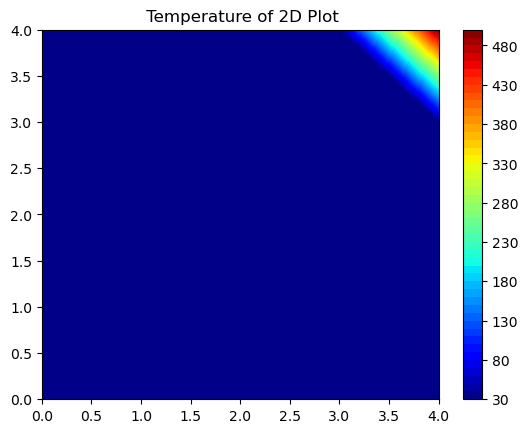

In [42]:
import numpy as np
import matplotlib.pyplot as plt

maxIter=500

lenX=5
lenY=5

delta=1

Ttop=500
Tbottom=30
Tleft=30
Tright=30


Tintial=30

colorinterpolation=50
colourMap=plt.cm.jet

X,Y = np.meshgrid (np.arange(0,lenX),np.arange(0,lenY))

T=np.empty((lenX,lenY))
T.fill(Tintial)

T[lenY-1:,:]=Ttop
T[:1,:]=Tbottom
T[:,:1]=Tleft
T[:,:lenX-1]=Tright

for i in range(0,maxIter):
    for i in range(0,lenX-1,delta):
        for j in range(0,lenY-1,delta):
            T[i][j]=0.25*(T[i+1][j]+T[i][j+1]+T[i-1][j]+T[i][j-1])

plt.title(" Temperature of 2D Plot")
plt.contourf(X,Y,T,colorinterpolation,cmap=colourMap)
plt.colorbar()
plt.show()

In [43]:
import numpy as np
x0=[-1,1]
c0=[1,1]
n=2

def sum(c,x,k,n):
    ans=0
    for i in range(0,n):
         ans=c[i]*((x[i])**(k-1))+ans
    return ans

def func(c,x,n):
    f=np.zeros([2*n,1])
    for i in range(0,(2*n)-1):
        if(i%2==0):
             f[i]=sum(c,x,i,n)
        if(i%2==1):
             f[i]=sum(c,x,i,n)-(2/i)

    return f

func(c0,x0,n)
fx=func(c0,x0,n)
np.linalg.norm(fx)

0.0

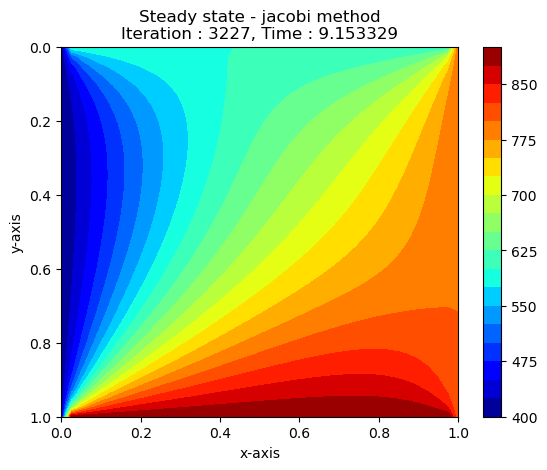

In [44]:
import numpy as np
import time

# Clear console
import os
os.system('cls' if os.name == 'nt' else 'clear')

# Steady-state heat conduction
# Input values
# Length of domain
l = 1

# Number of Grid points
nx = 40
ny = nx
x = np.linspace(0, l, nx)
y = np.linspace(0, l, ny)

dx = x[1] - x[0]
dy = y[1] - y[0]

# k value calculation
k = 2 * ((dx**2 + dy**2) / (dx**2 * dy**2))

# Error and tolerance value
error = 9e9
tolerance = 1e-4

# Omega value for SOR method
omega = 1.2

# Boundary condition
T_top = 600
T_bottom = 900
T_left = 400
T_right = 800

T = np.ones((nx, ny))
T[0, :] = 600
T[-1, :] = 900
T[:, 0] = 400
T[:, -1] = 800

# T old value
T_old = T.copy()

# Type of iterative solver
Iterative_solver = 1

# Jacobi method
tic = time.perf_counter()
if Iterative_solver == 1:
    
    jacobi_iter = 1
    while error > tolerance:
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                
                term1 = (T_old[i+1,j]+T_old[i-1,j]) / (dx**2)
                term2 = (T_old[i,j+1]+T_old[i,j-1]) / (dy**2)
                T[i,j] = (term1 + term2) / k
        
        # Error value calculation
        error = np.max(np.abs(T_old - T))
        
        # Updating T_old value
        T_old = T.copy()
        
        # Incrementation
        jacobi_iter += 1
    
    time_jacobi = time.perf_counter() - tic
    
    # Plotting
    import matplotlib.pyplot as plt
    
    plt.figure(1)
    plt.contourf(x, y, T, cmap='jet', levels=20)
    plt.title(f"Steady state - jacobi method\nIteration : {jacobi_iter}, Time : {time_jacobi:.6f}")
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.gca().invert_yaxis()
    plt.colorbar()

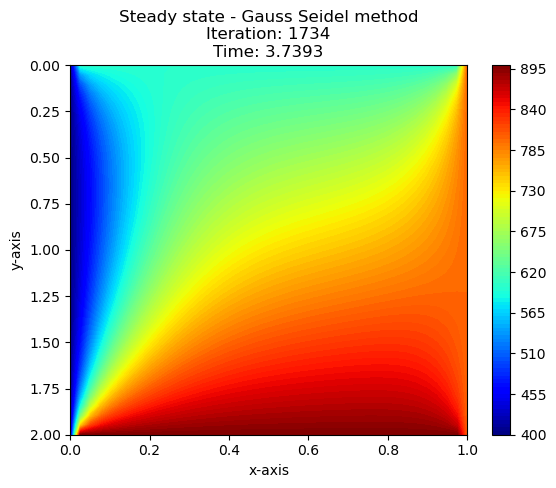

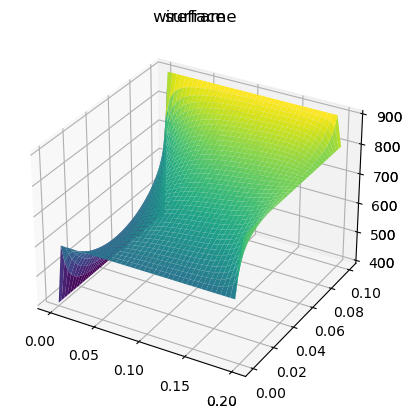

In [56]:
import numpy as np
import time

# Clear console
import os
os.system('cls' if os.name == 'nt' else 'clear')

# Steady-state heat conduction
# Input values
# Length of domain
l = 1
m=2
# Number of Grid points
nx = 40
ny = nx
x = np.linspace(0, l, nx)
y = np.linspace(0, m, nx)

dx = x[1] - x[0]
dy = y[1] - y[0]

# k value calculation
k = 2 * ((dx**2 + dy**2) / (dx**2 * dy**2))

# Error and tolerance value
error = 9e9
tolerance = 1e-4

# Omega value for SOR method
omega = 1.2

# Boundary condition
T_top = 600
T_bottom = 900
T_left = 400
T_right = 800

T = np.ones((nx, ny))
T[0, :] = 600
T[-1, :] = 900
T[:, 0] = 400
T[:, -1] = 800

# T old value
T_old = T.copy()

# Type of iterative solver
Iterative_solver = 2

# Jacobi method
tic = time.perf_counter()
if Iterative_solver == 2:
    start_time = time.time()
    GS_iter = 1
    while error > tolerance:
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                term1 = (T[i + 1, j] + T[i - 1, j]) / (dx ** 2)
                term2 = (T[i, j + 1] + T[i, j - 1]) / (dy ** 2)
                T[i, j] = (term1 + term2) / k

        # Error value calculation
        error = np.max(np.abs(T_old - T))

        # Updating T_old value
        T_old = T.copy()

        # Incrementation
        GS_iter += 1

    time = time.time() - start_time

    # Plotting
    plt.figure(1)
    plt.contourf(x, y, T, cmap='jet', levels=100)
    plt.title(f"Steady state - Gauss Seidel method\nIteration: {GS_iter}\nTime: {time:.4f}")
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.gca().invert_yaxis()
    plt.colorbar()


#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection = '3d')
# # gist_rainbow_r
#     ax.plot_surface(x, y, T[39,39], cmap = 'jet', edgecolor = 'none')
#     ax.set_xlabel('X [m]')
#     ax.set_ylabel('Y [m]')
#     ax.set_zlabel('T [°]')
#     plt.show()
    # fig = plt.figure(figsize=(6,5))
    # left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
    # ax = fig.add_axes([left, bottom, width, height]) 
    # cp = plt.contourf(x, y, T)
    # plt.colorbar(cp)

    # ax.set_title('Contour Plot')
    # ax.set_xlabel('x (cm)')
    # ax.set_ylabel('y (cm)')
    # plt.show()
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(X, Y, T, color='black')
    ax.set_title('wireframe')
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, T, rstride=1, cstride=1,
    cmap='viridis', edgecolor='none')
    ax.set_title('surface')

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def Cal_Temp(T1, T2, T, L, W, tol = 1e-6):
    ''' We will choose an unoform grid spacing'''

    # dx = 0.1   # delta x
    # dy = 0.1 
    # nx = int(L/dx) + 1
    # ny = int(W/dy) + 1 
    # X = [i*dx for i in range(nx)]
    # Y = [j*dy for j in range(ny)]
    nx = 40
    ny = nx
    X = np.linspace(0, l, nx)
    Y= np.linspace(0, m, nx)
    T[0, : ] = T1
    T[-1, : ] = T2
    T[ : ,0] = T1
    T[ : ,-1] = T1
    T_ref=T.copy()

    #Iteretaive procedure

    Max_iteration = 1000
    error = tol + 1
    iteration = 0

    while (error > tol):
        if(iteration > Max_iteration):
            return None
        else:
            for i in range(1,nx-1):
                for j in range(1,ny-1):
                    T[i][j] = 0.5*(1/((1/dx**2) + (1/dy**2)))*((1/dx**2)*T[i-1][j] + (1/dx**2)*T[i+1][j] + (1/dy**2)*T[i][j-1] + (1/dy**2)*T[i][j+1])
            error=np.max(np.abs((T-T_ref)))
            T_ref=T.copy()
        iteration += 1
    return T

T1 = float(input("Enter T1: "))
T2 = float(input("Enter T2: "))
L = float(input("Enter L: "))
W = float(input("Enter W: "))

# dx = 0.1   # delta x
# dy = 0.1
# nx = int(L/dx) + 1
# ny = int(W/dy) + 1 
nx = 40
ny = nx
X = np.linspace(0, l, nx)
Y = np.linspace(0, m, nx)
# X = [i*dx for i in range(nx)]
# Y = [j*dy for j in range(ny)]
T = np.zeros([nx,ny])
T_res = Cal_Temp(T1, T2, T, L, W)

plt.figure(1)
plt.contourf(X, Y, T_res, cmap='jet', levels=20)
plt.title("Gauss-Siedel Iterative method for solution to 2D Steady Heat Equation")
plt.xlabel("x-axis --->")
plt.ylabel("y-axis --->")
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

ValueError: could not convert string to float: ''